## Project Definiion

To predict the programs our user are likely to enjoy and make recommendations based on the prediction

### Data Description


- ViewsID	        	- a unique identifier for each view entry
- CustomerID 		    - the customer’s ID
- Name 		        	- the customer’s name
- State 		    	- the customer’s state of residence
- Age 			        - the customer’s age
- Gender 	        	- the customer’s gender
- Genre         		- the genre of the program
- Format        		- the format of the program
- Device 	        	- the medium used to view the program
- Viewing_Frequency     - the average number of views per week
- Total_Viewing_Time    - the average total viewing time view per week (in seconds)
- Rating 		        - the customer’s rating of the program
- Duration		        - the duration of the subscription in months
- Plan	 		        - the subscription plan
- Monthly_Cost	        - the cost of subscription per month



In [475]:
# Import necessary Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import association_metrics  
import association_metrics as am

from pandas.plotting import scatter_matrix

In [476]:
 ##Load the dataset
TvData = pd.read_csv('data/MavTv.csv')
TvData.head()

,CustomerID,Name,Age,Gender,State,Genre,Format,Device,Viewing_Frequency,Total_Viewing_Time,Plan,Monthly_Cost,Duration,Rating
0,1,Jelani Sofoluwe,35,Male,Akwa,Religion,TV-Shows,Decoder,4,72777,Basic,2500,4,4
1,2,Lee Balarabe,66,Male,Jigawa,Comedy,Live-Events,Tv-App,5,251472,Premium,5000,1,2
2,3,Lawrence Akinde,64,Male,Plateau,Comedy,TV-Shows,Tv-App,11,137732,Premium,5000,3,4
3,4,Freya Ajudua,58,Male,Niger,Sports,TV-Shows,Tv-App,2,105950,Elite,10000,12,2
4,5,Declan Ujah,57,Male,Akwa,Music,Live-Events,Browser,7,464270,Premium,5000,2,3


In [477]:
TvData['Plan'].unique()

array(['Basic', 'Premium', 'Elite'], dtype=object)

In [478]:
# Get a concise summary of features in the dataset
TvData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          5000 non-null   int64 
 1   Name                5000 non-null   object
 2   Age                 5000 non-null   int64 
 3   Gender              5000 non-null   object
 4   State               5000 non-null   object
 5   Genre               5000 non-null   object
 6   Format              5000 non-null   object
 7   Device              5000 non-null   object
 8   Viewing_Frequency   5000 non-null   int64 
 9   Total_Viewing_Time  5000 non-null   int64 
 10  Plan                5000 non-null   object
 11  Monthly_Cost        5000 non-null   int64 
 12  Duration            5000 non-null   int64 
 13  Rating              5000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 547.0+ KB


In [479]:
# Check for missing values
TvData.isna().count()

CustomerID            5000
Name                  5000
Age                   5000
Gender                5000
State                 5000
Genre                 5000
Format                5000
Device                5000
Viewing_Frequency     5000
Total_Viewing_Time    5000
Plan                  5000
Monthly_Cost          5000
Duration              5000
Rating                5000
dtype: int64

In [480]:
# Get statistical summary of dataset
TvData.describe()

,CustomerID,Age,Viewing_Frequency,Total_Viewing_Time,Monthly_Cost,Duration,Rating
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1495.723800,46.620600,5.479800,298835.144000,5629.500000,6.471800,3.013200
std,867.395992,16.568209,3.214227,177674.372424,2713.199595,3.150808,1.234071
min,1.000000,18.000000,0.000000,6.000000,2500.000000,1.000000,1.000000
25%,741.750000,32.000000,3.000000,140919.500000,5000.000000,4.000000,2.000000
50%,1495.000000,47.000000,5.000000,295446.500000,5000.000000,6.000000,3.000000
75%,2250.000000,61.000000,8.000000,454118.250000,5000.000000,9.000000,4.000000
max,3000.000000,75.000000,11.000000,604790.000000,10000.000000,12.000000,5.000000


In [481]:
correlation = TvData.corr()
correlation["Rating"].sort_values()

Viewing_Frequency    -0.027569
CustomerID           -0.027107
Duration             -0.012817
Age                  -0.000469
Total_Viewing_Time    0.005381
Monthly_Cost          0.022610
Rating                1.000000
Name: Rating, dtype: float64

In [482]:
TvData.skew()

CustomerID            0.003325
Age                  -0.012404
Viewing_Frequency     0.001661
Total_Viewing_Time    0.036223
Monthly_Cost          0.656807
Duration              0.003969
Rating               -0.009742
dtype: float64

In [483]:
# Check for duplicates
TvData.duplicated().sum()

0

## Exploratory Data Analysis

In [484]:
# Get column list
TvData.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'State', 'Genre', 'Format',
       'Device', 'Viewing_Frequency', 'Total_Viewing_Time', 'Plan',
       'Monthly_Cost', 'Duration', 'Rating'],
      dtype='object')

#### In-depth check for duplicate entries

In [485]:
# # Exclude the 'Viewing_Frequency' and 'Total_Viewing_Time' features to really find duplicates
# sub_data = TvData[['CustomerID', 'Name', 'Age', 'Gender', 'State', 'Genre', 'Format', 'Device',
#             'Plan', 'Monthly_Cost', 'Duration', 'Rating']]

# sub_data.head()

In [486]:
# # Get index of duplicate rows
# duplicates = sub_data[sub_data.duplicated()]
# duplicates.index

# # Drop duplicate rows by index
# TvData.drop(index=duplicates.index,inplace=True, axis=0)

In [487]:
# Exclude the 'Viewing_Frequency' and 'Total_Viewing_Time' features to really find duplicates
data_subset = ['CustomerID', 'Name', 'Age', 'Gender', 'State', 'Genre', 'Format', 'Device',
               'Plan', 'Monthly_Cost', 'Duration', 'Rating']

TvData.drop_duplicates(subset=data_subset, keep='last', inplace=True)

# Reset index of dataset
TvData.reset_index(drop=True, inplace=True)

In [488]:
# Check dataset shape (rows, columns)
TvData.shape

(4992, 14)

In [489]:
# cat_features = ['Gender', 'Genre', 'State','Format','Device','Plan', 'Rating']
cat_features = ['Gender', 'Genre', 'State','Format','Device','Plan']

#  Numerical features in dataset
num_features=['Duration', 'Total_Viewing_Time', 'Viewing_Frequency', 'Age', 'Rating']

## Univariate Analysis

###### Check for errors in values

In [490]:
# Unique values in State feature
TvData['State'].unique()

array(['Akwa', 'Jigawa', 'Plateau', 'Niger', 'Gombe', 'Anambra', 'Oyo',
       'Borno', 'Katsina', 'River', 'Sokoto', 'Bauchi', 'Adamawa',
       'Lagos', 'Enugu', 'Kogi', 'Imo', 'Ebonyi', 'Kwara', 'Cross',
       'Kano', 'Ogun', 'Taraba', 'Yobe', 'Kaduna', 'Benue', 'Ekiti',
       'Osun', 'Delta', 'Rivers', 'Nasarawa', 'Bayelsa', 'Kebbi', 'Ondo',
       'Edo', 'Abia', 'Ibom', 'Zamfara'], dtype=object)

In [491]:
# Correct errors in the State feature data
TvData['State'] = TvData['State'].replace({'Akwa':'Akwa Ibom', 'River':'Rivers', 'Ibom':'Abuja', 'Cross': 'Cross River'})

In [492]:
# Unique values in 'Viewing Frequency' feature
TvData['Viewing_Frequency'].unique()

array([ 4,  5, 11,  2,  7,  6,  1, 10,  8,  9,  3,  0], dtype=int64)

In [493]:
TvData[TvData['Viewing_Frequency'] == 0].head()

,CustomerID,Name,Age,Gender,State,Genre,Format,Device,Viewing_Frequency,Total_Viewing_Time,Plan,Monthly_Cost,Duration,Rating
64,65,Stewart Sofoluwe,46,Male,Anambra,Action,Live-Events,Decoder,0,521660,Basic,2500,7,3
97,98,Neville Aremu,26,Male,Adamawa,Sports,Live-Events,Tv-App,0,313019,Premium,5000,2,3
111,112,Jade Abagun,52,Male,Enugu,Drama,TV-Shows,Tv-App,0,177220,Premium,5000,1,1
145,146,Kasper Oteh,43,Male,Katsina,Music,TV-Shows,Tv-App,0,91869,Basic,2500,8,5
155,156,Brooke Onyeama,41,Male,Ebonyi,Sports,Live-Events,Tv-App,0,5549,Basic,2500,7,3


In [494]:
TvData[TvData['Viewing_Frequency'] == 0].describe()

,CustomerID,Age,Viewing_Frequency,Total_Viewing_Time,Monthly_Cost,Duration,Rating
count,228.000000,228.000000,228.0,228.000000,228.000000,228.000000,228.000000
mean,1515.381579,46.315789,0.0,301787.267544,5339.912281,6.618421,3.109649
std,854.105096,15.896037,0.0,180452.334983,2606.672899,3.065944,1.202528
min,37.000000,18.000000,0.0,1652.000000,2500.000000,1.000000,1.000000
25%,741.750000,32.750000,0.0,131296.750000,2500.000000,4.000000,2.000000
50%,1520.000000,48.000000,0.0,305005.500000,5000.000000,7.000000,3.000000
75%,2284.250000,60.000000,0.0,458805.500000,5000.000000,9.000000,4.000000
max,2993.000000,75.000000,0.0,604135.000000,10000.000000,12.000000,5.000000


In [495]:
# TvData[TvData['Total_Viewing_Time'] < 140]

###### Check for outliers in the numerical columns

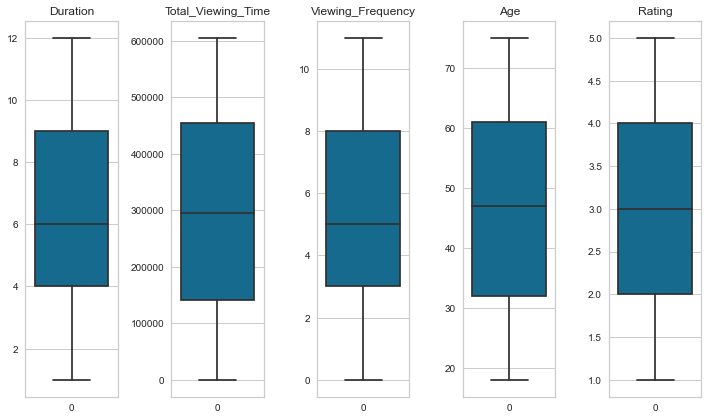

In [496]:
fig, axes = plt.subplots(ncols=len(num_features), figsize=(10, 6))

# Create boxplots with Seaborn
for column, axis in zip(num_features, axes):
        sns.boxplot(data=TvData[column], ax=axis)
        axis.set_title(column)
        # axis.set(xticklabels=[], xticks=[], ylabel=column)

# Show the plot
plt.tight_layout()
plt.show()

###### See data distribution in numerical features

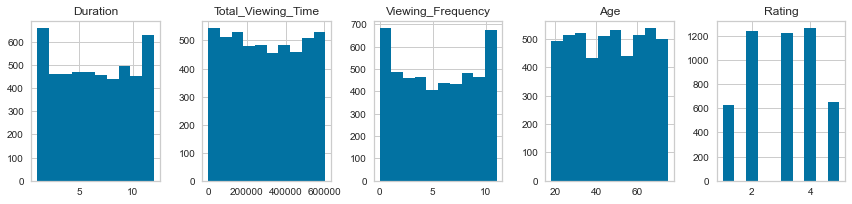

In [497]:
fig, axes = plt.subplots(ncols=len(num_features), figsize=(12, 3))

# Create histograms
for column, axis in zip(num_features, axes):
        TvData[column].hist(ax=axis)
        axis.set_title(column)

# Show the plot
plt.tight_layout()
plt.show()

In [498]:
# TvData.plot(kind='hist', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10, 10))
# plt.show()

In [499]:
# Subscriber engagement per device
TvData['Device'].value_counts()

Decoder       1671
Tv-App        1668
Browser        843
Mobile-App     810
Name: Device, dtype: int64

In [500]:
# Subscriber engagement per device
TvData['Plan'].value_counts()

Premium    2522
Elite      1243
Basic      1227
Name: Plan, dtype: int64

In [501]:
# TvData['Viewing_Frequency'].value_counts()

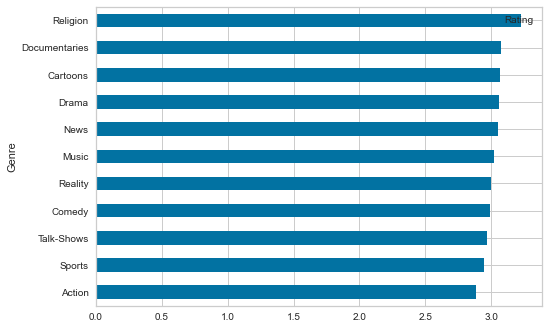

In [502]:
# Average rating by genre
TvData[['Rating','Genre']].groupby('Genre').mean().sort_values(by='Rating', ascending=True).plot.barh()

plt.show()

In [503]:
# Top 10 Average rating by genre and plan 
TvData[['Rating', 'Plan','Genre']].groupby(['Genre', 'Plan']).mean().sort_values(by='Rating', ascending=False).head(10)

Rating
Genre         Plan             
Religion      Elite    3.407407
Music         Elite    3.237288
Cartoons      Elite    3.228571
Drama         Elite    3.207547
Religion      Premium  3.179487
              Basic    3.108108
Documentaries Premium  3.107843
Drama         Premium  3.088710
News          Premium  3.084000
Documentaries Basic    3.070175

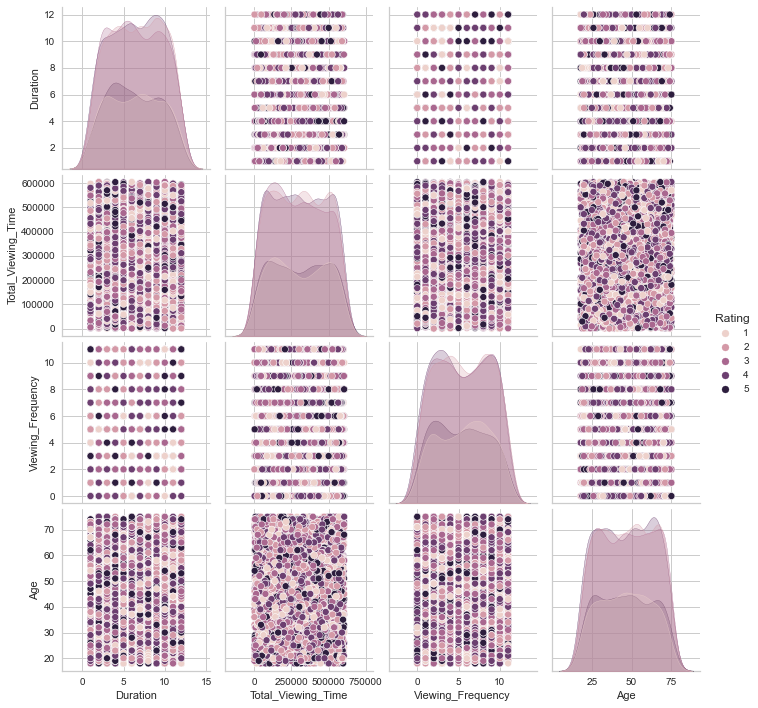

In [504]:
# Pairwise relationships of  numerical features in the dataset

# sns.pairplot(data=TvData, hue='Plan', height=3)
sns.pairplot(data=TvData[num_features], hue='Rating')

plt.show()

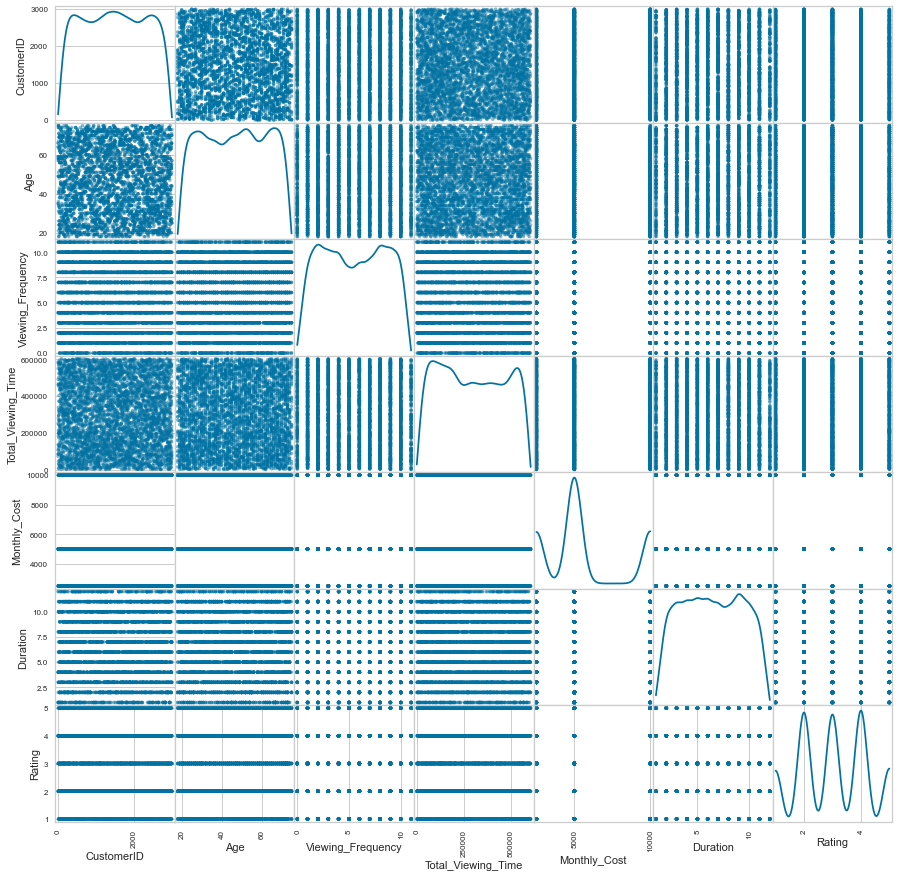

In [505]:
# Scatter plot matrix of numerical values
scatter_matrix(TvData, diagonal='kde', figsize=(15,15))

plt.show()

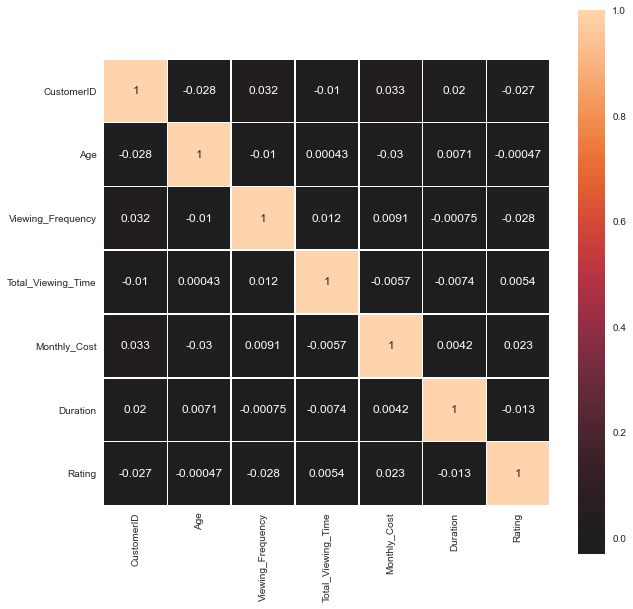

In [506]:
# sns.heatmap(correlation, annot=True, cmap = 'YlGnBu')
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, vmax=1.0, linewidths=0.5, annot=True, square=True, center=0)
plt.show()

In [507]:
# TvData[['Rating','Genre']].groupby('Genre').mean().sort_values('Rating')

In [508]:
# TvData[['Device','Genre', 'Rating']].where(
#     TvData['Rating'] < 3
# ).groupby(['Device','Genre']).mean().sort_values('Rating')

# Data Preprocessing

## Feature Engineering

In [509]:
# Convert categorical features in dataset to 'category' type 
TvData[cat_features] = TvData[cat_features].astype("category")

In [510]:
# Verify minimum age
TvData.Age.min()

18

In [511]:
# Generate age groups from the age feature

bins = [18,31,49,60,125]
labels = ["Young Adult","Middle Aged","Old Adult","Elderly"]
TvData["Age_Group"] = pd.cut(TvData["Age"], bins = bins ,labels = labels, right = False)

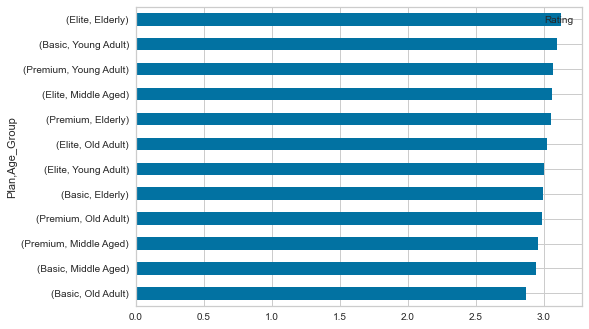

In [512]:
# Check average rating by plan and age group
TvData[['Rating', 'Plan','Age_Group']].groupby(['Plan', 'Age_Group']).mean().sort_values(by='Rating', ascending=True).plot.barh()
plt.show()

In [513]:
TvData[['Rating']].value_counts()

Rating
4         1259
2         1239
3         1218
5          649
1          627
dtype: int64

In [912]:
# Generate the target,'satisfaction', from the customer rating feature

# rating_dict = {1:'Low', 2:'Low', 3:'Neutral', 4:'High', 5:'High'}
rating_dict = {1:'No', 2:'No', 3:'Yes', 4:'Yes', 5:'Yes'}

# TvData['Satisfaction'] = TvData['Rating'].map(rating_dict)
TvData['Satisfied'] = TvData['Rating'].map(rating_dict)

In [913]:
# Convert 'Satisfied' to 'category' type 
TvData['Satisfied'] = TvData['Satisfied'].astype("category")

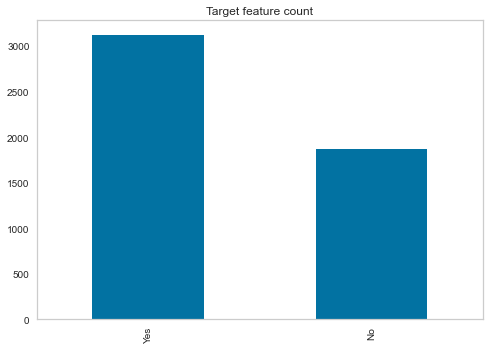

In [969]:
# View the balance in the target feature

# TvData[['CustomerID','Satisfied']].groupby('Satisfied').count().sort_values(by='CustomerID', ascending=True).plot.barh()
TvData['Satisfied'].value_counts().plot(kind='bar', title='Target feature count');

plt.grid(b=None)
plt.show()

In [915]:
# # Generate 'Duration Scale' category from the duration feature

# bins = [0, 5, 9, 24]
# labels = ["Low","Medium","High"]

# TvData["Duration_Scale"] = pd.cut(TvData["Duration"], bins = bins, labels = labels, right = False)

In [803]:
# # Generate 'Plan Duration' category from the 'duration' feature

# bins = [0, 4, 8, 50]
# labels = ["Low","Medium","High"]

# TvData["Freq_Scale"] = pd.cut(TvData["Viewing_Frequency"], bins = bins ,labels = labels, right = False)

In [519]:
# # Generate 'Plan Duration' category from the 'duration' feature

# bins = [0, 201601, 403201, 650000]
# labels = ["Low","Medium","High"]

# TvData["View_Scale"] = pd.cut(TvData["Total_Viewing_Time"], bins = bins ,labels = labels, right = False)

In [520]:
# TvData.sample(5)

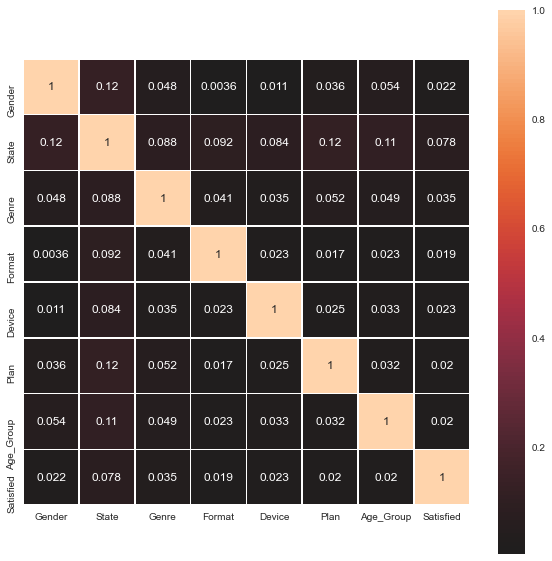

In [521]:
# Initialize a Cramer's V object using the dataset
cramersv = am.CramersV(TvData) 

# Get a pairwise matrix filled with Cramer's V, where columns and index are 
# the categorical variables of the dataset
cat_correlation = cramersv.fit()


fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(cat_correlation, vmax=1.0, linewidths=0.5, annot=True, square=True, center=0)
plt.show()

In [522]:
# TvData.info()

In [916]:
# Define the input features and target 

# col_to_drop = ['CustomerID','Name','Age', 'State','Monthly_Cost','Rating', 'Satisfied']
col_to_drop = ['CustomerID','Name','Age', 'State', 'Duration', 'Viewing_Frequency', 'Total_Viewing_Time', 'Monthly_Cost','Rating', 'Satisfied']

X = TvData.drop(columns = col_to_drop)
y = TvData['Satisfied']

In [917]:
X.sample(2)

,Gender,Genre,Format,Device,Plan,Age_Group
3707,Male,Cartoons,TV-Shows,Mobile-App,Premium,Young Adult
582,Male,Sports,Live-Events,Tv-App,Basic,Elderly


In [806]:
# X.info()

### Split the Data

In [918]:
from sklearn.model_selection import train_test_split

In [922]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20, stratify=y)

In [923]:
# y_train.value_counts()

In [924]:
# y_test.value_counts()

In [925]:
# X_train.head()

### Feature Encoding

In [926]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

###### Encode input features

In [927]:
# Initialize encoder instance
cat_encoder = OneHotEncoder(dtype=np.int, handle_unknown='ignore', sparse_output=False)

# Categorical features 
categorical = X.select_dtypes(include="category").columns

cat_exists = categorical.empty == False


# Encode categorical features if they exist in dataset
if (cat_exists):
    
    # Encode the categorical features(columns) and generate appropriate column names
    cat_train_df = pd.DataFrame(cat_encoder.fit_transform(X_train[categorical]), index=X_train.index)
    cat_test_df = pd.DataFrame(cat_encoder.transform(X_test[categorical]), index=X_test.index)

    cat_train_df.columns = cat_encoder.get_feature_names_out(categorical)
    cat_test_df.columns = cat_encoder.get_feature_names_out(categorical)
    
    # cat_train_df.columns
    
    # Join the new dataframe to our original data then drop the categorical columns
    X_train = X_train.join(cat_train_df).drop(columns = categorical)
    X_test = X_test.join(cat_test_df).drop(columns = categorical)

In [928]:
# X.shape

In [929]:
# y.value_counts()

###### Encode the target feature

In [930]:
# Initialize encoder instance
target_enc = LabelEncoder()

target_enc.fit(y_train)

y_train = target_enc.transform(y_train)

y_test = target_enc.transform(y_test)

# target_enc.inverse_transform([0,1])

In [931]:
target_enc.inverse_transform([0,1])

array(['No', 'Yes'], dtype=object)

### Feature Scaling

In [873]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [874]:
# # Initialize scaler instance
# # input_scaler = StandardScaler()
# input_scaler = MinMaxScaler() 

# # Numerical features(columns) in the dataset
# numerical = X.select_dtypes(include="number").columns

# num_exists = numerical.empty == False

# # Scale numerical features if they exist in dataset
# if (num_exists):
#     X_train[numerical] = input_scaler.fit_transform(X_train[numerical])
#     X_test[numerical] = input_scaler.transform(X_test[numerical])

### Feature importance

In [875]:
# Import necessary libraries
from sklearn.feature_selection import RFE, SelectKBest, chi2, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

In [876]:
# # Use Random Forest Classifier to perform feature ranking/selection
# clf_rf = RandomForestClassifier()
# selector = RFE(estimator = clf_rf)

# # selector = selector.fit(X_train_scaled, y_train_enc)
# selector = selector.fit(X_train, y_train)

# best_features = X_train.columns[selector.support_]

In [877]:
# print("Selected best features/columns are: ")
# pd.DataFrame(best_features, columns=["Best Features"])

In [878]:
# print("Features Ranking: ", selector.ranking_)

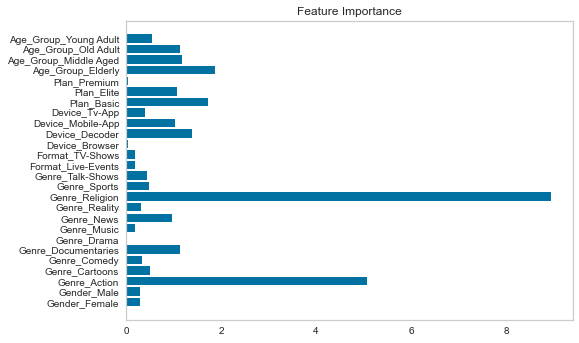

In [932]:
# feature selection
def select_features(X_train, y_train, X_test):
#  fs = SelectKBest(score_func=mutual_info_classif, k=12)
 fs = SelectKBest(score_func=chi2)
 fs.fit(X_train, y_train)
 X_train_fs = fs.transform(X_train)
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
# for i in range(len(fs.scores_)):
#  print('Feature %d: %f' % (i, fs.scores_[i]))

# plot the scores
# fig = plt.figure(figsize=(10, 10))
plt.barh([i for i in range(len(fs.scores_))], fs.scores_)
plt.yticks([i for i in range(len(fs.scores_))], labels=fs.feature_names_in_)
plt.grid(b=None)
plt.title("Feature Importance")
plt.show()

In [ ]:
feat = pd.DataFrame(fs.score_, columns=fs.feature_names_in_)

In [971]:
print(fs.feature_names_in_)

['Gender_Female' 'Gender_Male' 'Genre_Action' 'Genre_Cartoons'
 'Genre_Comedy' 'Genre_Documentaries' 'Genre_Drama' 'Genre_Music'
 'Genre_News' 'Genre_Reality' 'Genre_Religion' 'Genre_Sports'
 'Genre_Talk-Shows' 'Format_Live-Events' 'Format_TV-Shows'
 'Device_Browser' 'Device_Decoder' 'Device_Mobile-App' 'Device_Tv-App'
 'Plan_Basic' 'Plan_Elite' 'Plan_Premium' 'Age_Group_Elderly'
 'Age_Group_Middle Aged' 'Age_Group_Old Adult' 'Age_Group_Young Adult']


In [656]:
# X_train.columns

######  Use selected (best) features

In [630]:
# X_train = X_train[best_features]
# X_test = X_test[best_features]

# Prediction

In [933]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score

from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [966]:
# Evaluate model using classification report
def modelEval(model):
    model.fit(X_train, y_train)

#     accuracy = model.score(X_test, y_test)
    
    y_pred = model.predict(X_test)
    y_prob_test = model.predict_proba(X_test)[:, 1]
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob_test > 0.4)
    
    df = pd.DataFrame({
        'Precision': precision, 
        'Recall' : recall
#         'Thresholds' : thresholds + [0]
    })
    print(df.head(5))

    
    print("*** MODEL EVALUATION REPORT *** \n")
    print("AUC_ROC Score", roc_auc_score(y_test, y_prob_test))
    print("F1 Score", f1_score(y_test, y_pred))
    # print("Mean Accuracy: ", accuracy)
    print(classification_report(y_test, y_pred))
    print('\n')

    # Plot the Precision-Recall Curve
    display = PrecisionRecallDisplay.from_estimator(model, X_test, y_test, name="Avg Precision", )
    _ = display.ax_.set_title("Precision-Recall curve")
    plt.show()
    
    # Plot the Precision-Recall Curve
#     plt.fill_between(recall, precision)
#     plt.ylabel("Precision")
#     plt.xlabel("Recall")
#     plt.title("Precision-Recall curve")
#     plt.show()
                          
    # Display the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No', 'Yes'])
    
    cm_display.plot()
    plt.title("Confusion Matrix")
    plt.show()
    
    print('\n')
    

In [967]:
# Base models for experiment
models = [
    RandomForestClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42),
    LogisticRegression(random_state=42),
    GaussianNB(),
    XGBClassifier(random_state=42),
    KNeighborsClassifier()
]

   Precision    Recall
0   0.626627  1.000000
1   0.625610  0.819489
2   1.000000  0.000000
*** MODEL EVALUATION REPORT *** 

AUC_ROC Score 0.525385656408192
F1 Score 0.6746626686656672
              precision    recall  f1-score   support

           0       0.40      0.31      0.35       373
           1       0.64      0.72      0.67       626

    accuracy                           0.57       999
   macro avg       0.52      0.51      0.51       999
weighted avg       0.55      0.57      0.55       999





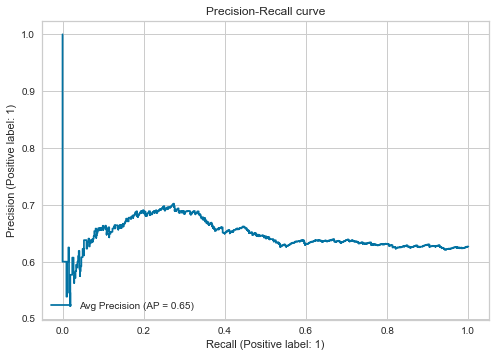

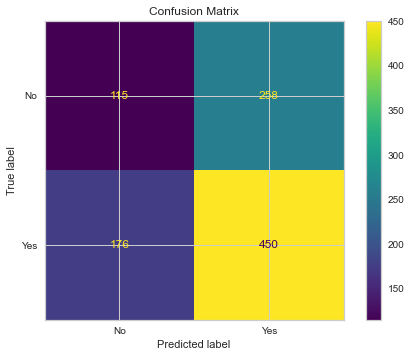



   Precision    Recall
0   0.626627  1.000000
1   0.634309  0.761981
2   1.000000  0.000000
*** MODEL EVALUATION REPORT *** 

AUC_ROC Score 0.5210943990954955
F1 Score 0.6218905472636815
              precision    recall  f1-score   support

           0       0.40      0.45      0.42       373
           1       0.65      0.60      0.62       626

    accuracy                           0.54       999
   macro avg       0.52      0.52      0.52       999
weighted avg       0.55      0.54      0.55       999





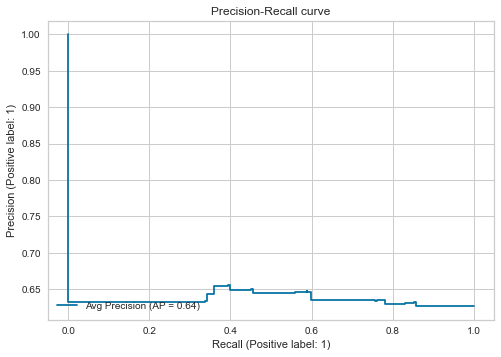

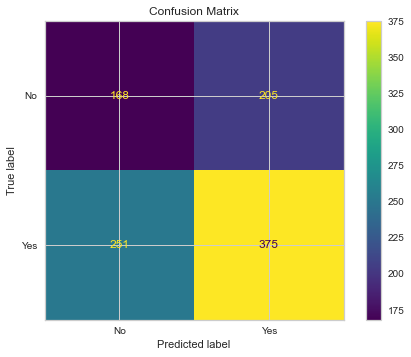



   Precision  Recall
0   0.626627     1.0
1   1.000000     0.0
*** MODEL EVALUATION REPORT *** 

AUC_ROC Score 0.48895493751552477
F1 Score 0.7704615384615385
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       373
           1       0.63      1.00      0.77       626

    accuracy                           0.63       999
   macro avg       0.31      0.50      0.39       999
weighted avg       0.39      0.63      0.48       999





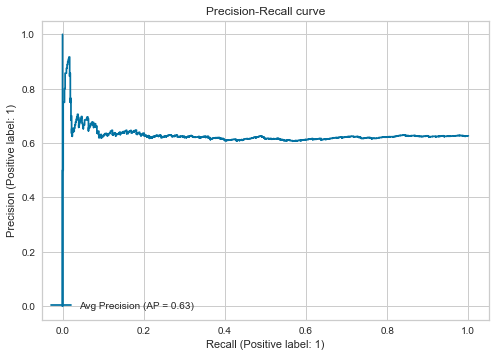

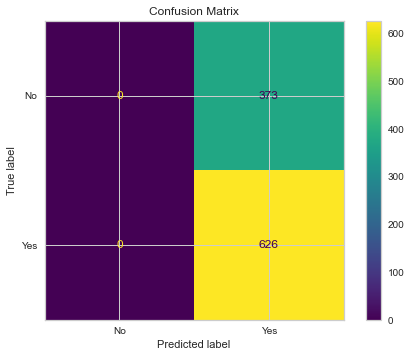



   Precision   Recall
0   0.626627  1.00000
1   0.624569  0.86901
2   1.000000  0.00000
*** MODEL EVALUATION REPORT *** 

AUC_ROC Score 0.48080925746687336
F1 Score 0.6353297952994693
              precision    recall  f1-score   support

           0       0.32      0.27      0.29       373
           1       0.60      0.67      0.64       626

    accuracy                           0.52       999
   macro avg       0.46      0.47      0.46       999
weighted avg       0.50      0.52      0.51       999





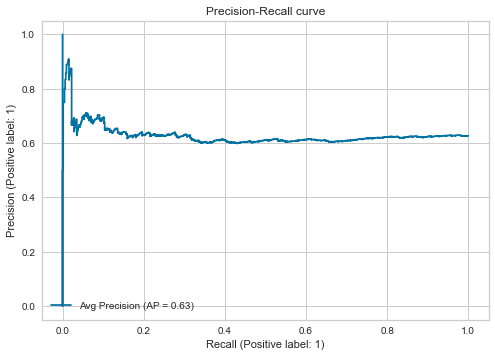

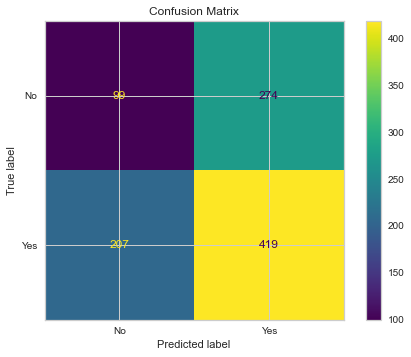



[08:31:47] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
   Precision    Recall
0   0.626627  1.000000
1   0.628472  0.867412
2   1.000000  0.000000
*** MODEL EVALUATION REPORT *** 

AUC_ROC Score 0.5155547370855424
F1 Score 0.6883586406362978
              precision    recall  f1-score   support

           0       0.38      0.25      0.30       373
           1       0.63      0.76      0.69       626

    accuracy                           0.57       999
   macro avg       0.50      0.50      0.49       999
weighted avg       0.54      0.57      0.54       999





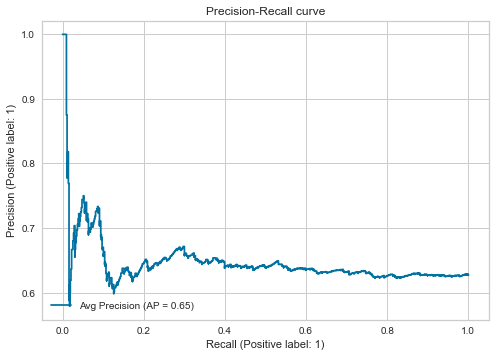

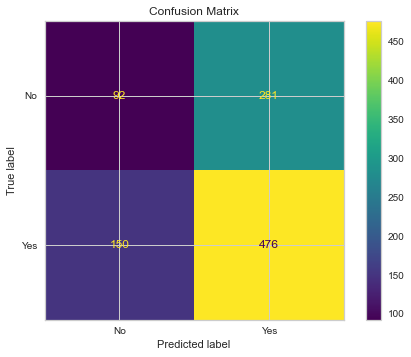



   Precision    Recall
0   0.626627  1.000000
1   0.635870  0.747604
2   1.000000  0.000000
*** MODEL EVALUATION REPORT *** 

AUC_ROC Score 0.5295398675791656
F1 Score 0.6872246696035244
              precision    recall  f1-score   support

           0       0.40      0.28      0.33       373
           1       0.64      0.75      0.69       626

    accuracy                           0.57       999
   macro avg       0.52      0.51      0.51       999
weighted avg       0.55      0.57      0.55       999





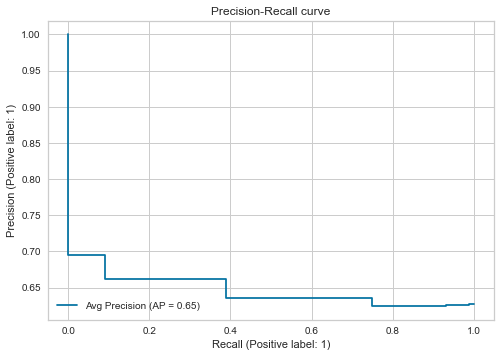

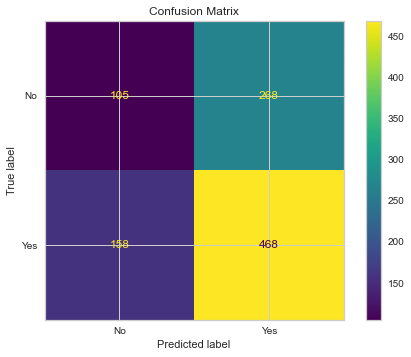

In [968]:
for model in models:
    modelEval(model)

In [797]:
# print(y_pred)

In [283]:
# print(y_test)

## Hyperparameter Tuning

In [842]:
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# from sklearn.linear_model import SGDClassifier

import scipy.stats as stats
from sklearn.utils.fixes import loguniform


# import packages for random oversampling training data
# from numpy import mean

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTETomek

In [937]:
# Create an oversampler for the minority class

over_sampler = RandomOverSampler( random_state=42)
# over_sampler = SMOTETomek(random_state=42)
# over_sampler = SMOTE(sampling_strategy='minority', random_state=42)

# fit and apply the transform
X_over, y_over = over_sampler.fit_resample(X_train, y_train)

In [838]:
# # define pipeline
# steps = [('over', over_sampler), ('model', DecisionTreeClassifier())]
# imb_pipeline = Pipeline(steps=steps)

# # define evaluation
# # cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# # evaluate pipeline
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# scores = cross_val_score(imb_pipeline, X=X_train, y=y_train, scoring='f1', cv=cv, n_jobs=-1)
# score = np.mean(scores)
# print('F1 Score: %.3f' % score)

In [288]:
def tuneModel(model, params):

    # Define evaluation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

    # Define search
    # clf = RandomizedSearchCV(n_iter=20, scoring='f1_micro')
    clf = RandomizedSearchCV(estimator = model, param_distributions = params, scoring='f1', cv = cv,  n_jobs=-1)

    # Execute search for best hyperparameter combination
    result = clf.fit(X_train, y_train)

    # Summarize result
    print (f'Train Accuracy - : {result.score(X_train, y_train):.3f}')
    print (f'Test Accuracy - : {result.score(X_test, y_test):.3f}', '\n' )
    
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

#### Random Forest Classifier 

In [236]:
clf = RandomForestClassifier()

# Define the parameter distributions
clf_params = {
    'model__n_estimators': [int(x) for x in np.linspace(start = 2, stop = 20)],
#     'model__max_features': ['sqrt', 'log2', None],
    'model__max_depth': [int(x) for x in np.linspace(start = 1, stop = 10)],
    'model__bootstrap': [True, False]
}

# Define pipeline
steps = [('over', over_sampler), ('model', clf)]
clf_pipeline = Pipeline(steps=steps)

# Find best classifier parameters
tuneModel(clf_pipeline, clf_params)

Train Accuracy - : 0.529
Test Accuracy - : 0.392 

Best Score: 0.3940285355690999
Best Hyperparameters: {'model__n_estimators': 35, 'model__max_depth': 5, 'model__bootstrap': True}


###### Decision Tree Classifier

In [237]:
clf = DecisionTreeClassifier()

# Define the parameter distributions
clf_params = {
    'model__max_depth': [int(x) for x in np.linspace(start = 1, stop = 10)],
}

# Define pipeline
steps = [('over', over_sampler), ('model', clf)]
clf_pipeline = Pipeline(steps=steps)

# Find best model parameters
tuneModel(clf_pipeline, clf_params)

Train Accuracy - : 0.368
Test Accuracy - : 0.351 

Best Score: 0.4653761851889502
Best Hyperparameters: {'model__max_depth': 4}


In [240]:
clf = KNeighborsClassifier()

# Define the parameter distributions
clf_params = {
    'model__n_neighbors': [int(x) for x in np.linspace(start = 1, stop = 10)]
}

# Define pipeline
steps = [('over', over_sampler), ('model', clf)]
clf_pipeline = Pipeline(steps=steps)

# Find best model parameters
tuneModel(clf_pipeline, clf_params)

Train Accuracy - : 0.649
Test Accuracy - : 0.461 

Best Score: 0.4415850860633434
Best Hyperparameters: {'model__n_neighbors': 7}


In [241]:
clf = XGBClassifier()

# Define the parameter distributions
clf_params = {
    'model__n_estimators': [int(x) for x in np.linspace(start = 2, stop = 10)],
    'model__max_depth': [int(x) for x in np.linspace(start = 1, stop = 10)]
}

# Define pipeline
steps = [('over', over_sampler), ('model', clf)]
clf_pipeline = Pipeline(steps=steps)

# Find best model parameters
tuneModel(clf_pipeline, clf_params)

[19:05:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Accuracy - : 0.871
Test Accuracy - : 0.299 

Best Score: 0.33926426262138404
Best Hyperparameters: {'model__n_estimators': 22, 'model__max_depth': 14}


### Evaluate Improved Models

In [1333]:
# lr_model = LogisticRegression(C = 23.853007347341627, penalty = 'none', solver = 'lbfgs')


# modelEval(lr_model)

In [1334]:
# rf_model = RandomForestClassifier(n_estimators=28, max_features='sqrt', max_depth=9, bootstrap= True, random_state=42)

# rf_model = RandomForestClassifier(n_estimators=15, min_samples_split = 10, min_samples_leaf = 2, 
#                                   max_features='sqrt', max_depth=18, bootstrap= False, random_state=42)

# rf_model = RandomForestClassifier(n_estimators=35, min_samples_split = 2, min_samples_leaf = 2, 
#                                   max_features='sqrt', max_depth=17, bootstrap= False, random_state=42)

# rf_model = RandomForestClassifier(n_estimators=48, min_samples_leaf = 2, max_depth=19, bootstrap= False, random_state=42)
# rf_model = RandomForestClassifier(n_estimators=18, max_depth=16, max_features = 'sqrt', bootstrap= False, random_state=42)


# modelEval(rf_model)

In [1329]:
# Train Accuracy - : 0.872
# Test Accuracy - : 0.557 

# Best Score: 0.5618734664639008
# Best Hyperparameters: {'model__n_estimators': 40, 'model__min_samples_split': 10, 'model__min_samples_leaf': 1, 'model__max_features': 'auto', 'model__max_depth': 18, 'model__bootstrap': False}

Empty DataFrame
Columns: [Precision, Recall]
Index: []
*** MODEL EVALUATION REPORT *** 

AUC_ROC Score 0.49808862338455795
F1 Score 0.10989010989010989
              precision    recall  f1-score   support

           0       0.61      0.92      0.74       617
           1       0.34      0.07      0.11       382

    accuracy                           0.59       999
   macro avg       0.48      0.49      0.42       999
weighted avg       0.51      0.59      0.50       999





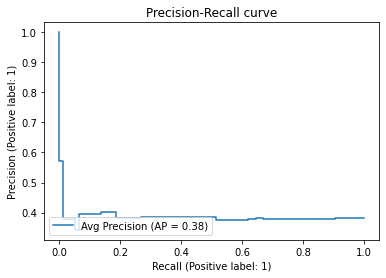

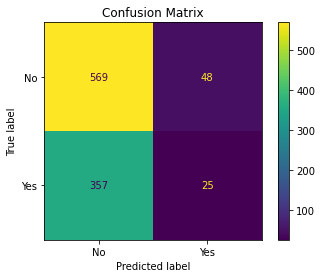

In [239]:
# Train Accuracy - : 0.902
# Test Accuracy - : 0.511 

# Best Score: 0.5453186637207198
# Best Hyperparameters: {'model__n_estimators': 28, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': 'auto', 'model__max_depth': 18, 'model__bootstrap': False}

# Best Hyperparameters: {'model__n_estimators': 43, 'model__max_features': None, 'model__max_depth': 6, 'model__bootstrap': False}
    
rf_model = DecisionTreeClassifier(max_depth = 4, random_state=42)

modelEval(rf_model)

   Precision   Recall
0   0.382382  1.00000
1   0.387850  0.86911
2   1.000000  0.00000
*** MODEL EVALUATION REPORT *** 

AUC_ROC Score 0.49475591232700034
F1 Score 0.32947976878612717
              precision    recall  f1-score   support

           0       0.61      0.68      0.64       617
           1       0.37      0.30      0.33       382

    accuracy                           0.54       999
   macro avg       0.49      0.49      0.49       999
weighted avg       0.52      0.54      0.52       999





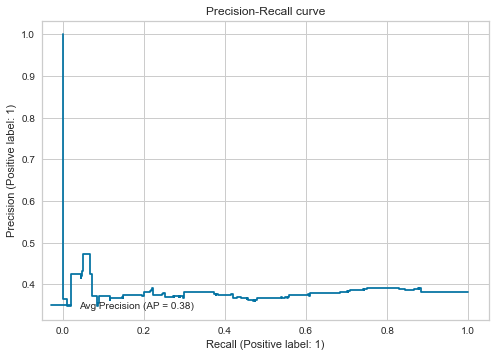

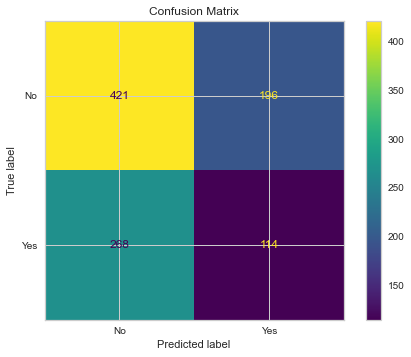

In [360]:
rf_model = RandomForestClassifier(n_estimators=52, min_samples_split = 10, max_depth=20,  min_samples_leaf = 3, max_features = None, bootstrap= False, random_state=42)
# rf_model = RandomForestClassifier(n_estimators=49, min_samples_split = 7, max_depth=14, min_samples_leaf = 3, max_features = None, bootstrap= False, random_state=42)


modelEval(rf_model)

#### XGB Classifier

[23:48:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
   Precision   Recall
0   0.382382  1.00000
1   0.378889  0.89267
2   1.000000  0.00000
*** MODEL EVALUATION REPORT *** 

AUC_ROC Score 0.4759136846928645
F1 Score 0.32763532763532766
              precision    recall  f1-score   support

           0       0.61      0.67      0.64       617
           1       0.36      0.30      0.33       382

    accuracy                           0.53       999
   macro avg       0.48      0.48      0.48       999
weighted avg       0.51      0.53      0.52       999





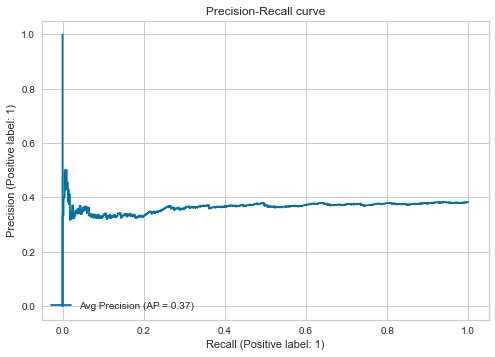

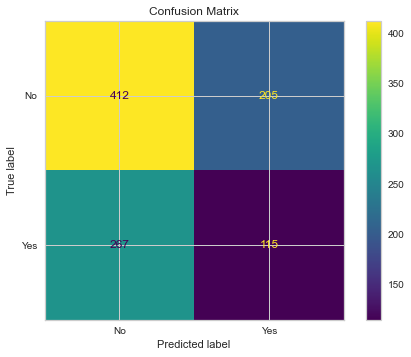

In [338]:
xgb_model = XGBClassifier(random_state=42)

modelEval(xgb_model)

# Tracking Experiment with Neptune

In [961]:
# Import libraries
import neptune.new as neptune
from sklearn.pipeline import Pipeline
import neptune.new.integrations.sklearn as npt_utils

# Setup the pipeline steps: steps
# steps = [('model', RandomForestClassifier(random_state=42))]
# steps = [('model', DecisionTreeClassifier(random_state=42))]
steps = [('model', KNeighborsClassifier())]


# Create the pipeline: pipeline
pipeline = Pipeline(steps)

In [962]:
# input neptune credentials

run = neptune.init_run(
    project="conyema/mavtv",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJmNDVjOGFlOC0xZWVmLTQxM2QtODUyMi1mYTA1NDNkNDk1NDQifQ==",
)

https://app.neptune.ai/conyema/mavtv/e/MAV-13
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


In [963]:
# save dataset to a local folder named cleaned
X_over.to_csv("./datasets/X_train.csv")
X_test.to_csv("./datasets/X_test.csv")
pd.DataFrame(y_over).to_csv("./datasets/y_train.csv")
pd.DataFrame(y_test).to_csv("./datasets/y_test.csv")

# Move the all the content of the clean folder to neptune
run["clean_dataset"].track_files("./datasets")

In [964]:
# train algorithm with training data and log experiment on neptune

pipeline.fit(X_train, y_train)
# run["classifier_dt"] = npt_utils.create_classifier_summary(pipeline, X_train, X_test, y_train, y_test)
# run["classifier_rf"] = npt_utils.create_classifier_summary(pipeline, X_train, X_test, y_train, y_test)
run["classifier_knn"] = npt_utils.create_classifier_summary(pipeline, X_train, X_test, y_train, y_test)

In [965]:

# stop the experiment
run.stop()

Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 31 operations to synchronize with Neptune. Do not kill this process.
All 31 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/conyema/mavtv/e/MAV-13


# Prepare Model for Deployment

In [1335]:
# Import necessary libraries
import pickle

In [1336]:
# Create a pickle file of model, scacler and the encoders using serializtion

# save the model
# dump(model, open('model.pkl', 'wb'))
# with open('model.pkl', 'wb') as file:
#     pickle.dump(lr_model, file)

# # save the scaler
# with open('scaler.pkl', 'wb') as file:
#     pickle.dump(input_scaler, file)
    
# # save the target encoder
# with open('label_enc.pkl', 'wb') as file:
#     pickle.dump(target_enc, file)

# # save the category encoder
# with open('cat_encoder.pkl', 'wb') as file:
#     pickle.dump(cat_encoder, file)
    

In [1337]:
# cat_encoder.transform(['Akwa Ibom'].reshape(-1, 1))